In [1]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np



In [49]:
#1 Завдання Прочитайте CSV файл spark.read.csv()
spark = SparkSession.builder.appName("PythonSparkCSV").getOrCreate()

df = spark.read.csv("C:/Users/Саша/Desktop/bestsellers with categories.csv")



In [50]:
#2 Завдання вивести схему даних за допомогою PrintSchema.

df.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)



In [51]:
#3 Завдання Вивести назви стовпців і типи даних за допомогою dtypes
df.dtypes


[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string'),
 ('_c6', 'string')]

In [52]:
#4 Завдання Виведіть перші п'ять рядків (використовується метод head)
df.head(5)


[Row(_c0='Name', _c1='Author', _c2='User Rating', _c3='Reviews', _c4='Price', _c5='Year', _c6='Genre'),
 Row(_c0='10-Day Green Smoothie Cleanse', _c1='JJ Smith', _c2='4.7', _c3='17350', _c4='8', _c5='2016', _c6='Non Fiction'),
 Row(_c0='11/22/63: A Novel', _c1='Stephen King', _c2='4.6', _c3='2052', _c4='22', _c5='2011', _c6='Fiction'),
 Row(_c0='12 Rules for Life: An Antidote to Chaos', _c1='Jordan B. Peterson', _c2='4.7', _c3='18979', _c4='15', _c5='2018', _c6='Non Fiction'),
 Row(_c0='1984 (Signet Classics)', _c1='George Orwell', _c2='4.7', _c3='21424', _c4='6', _c5='2017', _c6='Fiction')]

In [53]:
#5 Завдання Вивести перший рядок за допомогою first()
df.first()

Row(_c0='Name', _c1='Author', _c2='User Rating', _c3='Reviews', _c4='Price', _c5='Year', _c6='Genre')

In [55]:
#6 Завдання Зробіть опис датасету за допомогою describe()
df.describe().show()



+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                 _c0|             _c1|                _c2|               _c3|               _c4|               _c5|        _c6|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 551|             551|                551|               551|               551|               551|        551|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|             10009|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

In [56]:
#7 Завдання виведіть список стовпців за допомогою columns()
df.columns

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6']

In [57]:
#8 Завдання виведіть загальну кількість рядків даних за допомогою count()
df.count()

551

In [58]:
#9 Завдання Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить
#їх на NaN, потім тип даних на числовий.
from pyspark.sql.functions import isnan, when, count, col


for c in df.columns:
    df = df.withColumn(c, when(col(c).isNull(), np.nan).otherwise(col(c)))

# змінити тип даних числових стовпців
numeric_cols = ['_c2', '_c3', '_c4', '_c5']
for ncol in numeric_cols:
    df = df.withColumn(ncol, df[ncol].cast("float"))
df.show()

+--------------------+--------------------+----+-------+----+------+-----------+
|                 _c0|                 _c1| _c2|    _c3| _c4|   _c5|        _c6|
+--------------------+--------------------+----+-------+----+------+-----------+
|                Name|              Author|null|   null|null|  null|      Genre|
|10-Day Green Smoo...|            JJ Smith| 4.7|17350.0| 8.0|2016.0|Non Fiction|
|   11/22/63: A Novel|        Stephen King| 4.6| 2052.0|22.0|2011.0|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson| 4.7|18979.0|15.0|2018.0|Non Fiction|
|1984 (Signet Clas...|       George Orwell| 4.7|21424.0| 6.0|2017.0|    Fiction|
|5,000 Awesome Fac...|National Geograph...| 4.8| 7665.0|12.0|2019.0|Non Fiction|
|A Dance with Drag...| George R. R. Martin| 4.4|12643.0|11.0|2011.0|    Fiction|
|A Game of Thrones...| George R. R. Martin| 4.7|19735.0|30.0|2014.0|    Fiction|
|A Gentleman in Mo...|         Amor Towles| 4.7|19699.0|15.0|2017.0|    Fiction|
|A Higher Loyalty:...|      

In [59]:
#10 Завдання Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.
from pyspark.sql.functions import avg

num_cols = ['_c2', '_c3', '_c4', '_c5']

for col_name in num_cols:

    mean_value = df.select(avg(col_name)).first()[0]
    
    df = df.withColumn(
        col_name, 
        when(col(col_name).isNull(), mean_value).otherwise(col(col_name))
    )
    
    df = df.withColumn(
        col_name, 
        df[col_name].cast("float")
    )
df.show()

+--------------------+--------------------+--------+---------+----+------+-----------+
|                 _c0|                 _c1|     _c2|      _c3| _c4|   _c5|        _c6|
+--------------------+--------------------+--------+---------+----+------+-----------+
|                Name|              Author|4.618364|11953.282|13.1|2014.0|      Genre|
|10-Day Green Smoo...|            JJ Smith|     4.7|  17350.0| 8.0|2016.0|Non Fiction|
|   11/22/63: A Novel|        Stephen King|     4.6|   2052.0|22.0|2011.0|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|     4.7|  18979.0|15.0|2018.0|Non Fiction|
|1984 (Signet Clas...|       George Orwell|     4.7|  21424.0| 6.0|2017.0|    Fiction|
|5,000 Awesome Fac...|National Geograph...|     4.8|   7665.0|12.0|2019.0|Non Fiction|
|A Dance with Drag...| George R. R. Martin|     4.4|  12643.0|11.0|2011.0|    Fiction|
|A Game of Thrones...| George R. R. Martin|     4.7|  19735.0|30.0|2014.0|    Fiction|
|A Gentleman in Mo...|         Amor Towles|

In [60]:
#Скільки книг в датасеті
from pyspark.sql.functions import col, count
column = '_c0'

count = df.select(count(col(column))).first()[0] 

print(f"Кількість книг {column}: {count}")

Кількість книг _c0: 551


In [62]:
#11-12 Завдання Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.
#df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

new_columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


df = df.toDF(*new_columns) 


df.show()

+--------------------+--------------------+-----------+---------+-----+------+-----------+
|                name|              author|user_rating|  reviews|price|  year|      genre|
+--------------------+--------------------+-----------+---------+-----+------+-----------+
|                Name|              Author|   4.618364|11953.282| 13.1|2014.0|      Genre|
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350.0|  8.0|2016.0|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052.0| 22.0|2011.0|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979.0| 15.0|2018.0|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424.0|  6.0|2017.0|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665.0| 12.0|2019.0|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643.0| 11.0|2011.0|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735.0| 30.0|2014.0|    Fiction|

In [64]:
#13 Завдання Знайдіть автора з найвищим рейтингом 

print("Author with highest rating:",  
       df.sort(col("user_rating").desc())
         .select("author")
         .limit(1) 
         .first()["author"])

Author with highest rating: Bill Martin Jr.


In [65]:
#14 Завдання Знайдіть автора з найнижчим рейтингом 
print("Author with lowest rating:",
      df.sort(col("user_rating").asc())
      .select("author").first()["author"])


Author with lowest rating: J.K. Rowling


In [66]:
#15 Завдання знайдіть автора, що має найбільшу кількіть рецензій.

print("Author with most reviews:",
      df.sort(col("reviews").desc())
      .select("author").first()["author"])


Author with most reviews: Delia Owens


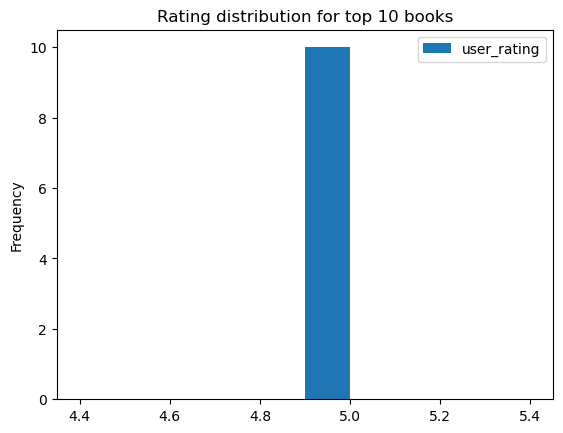

In [68]:
#16 Завдання Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з
#найбільшим рейтингом).
top10 = df.sort(col("user_rating").desc()).limit(10) 
ratings = top10.select("user_rating")
import matplotlib.pyplot as plt
%matplotlib inline  
ratings.toPandas().plot(kind='hist') 
plt.title("Rating distribution for top 10 books")
plt.show()

In [70]:
#17 Завдання Побудуйте матрицю кореляції для стовпчиків user_rating', 'reviews', price

from pyspark.sql.functions import col, corr

corr_mat = df.select(
   corr(col("user_rating"), col("reviews")).alias("user_rating_reviews"),
   corr(col("user_rating"), col("price")).alias("user_rating_price"), 
   corr(col("reviews"), col("price")).alias("reviews_price")
).first()

print("Correlation matrix:",corr_mat)


Correlation matrix: Row(user_rating_reviews=-0.001729008831964381, user_rating_price=-0.13308630757790588, reviews_price=-0.10918188342780541)
